In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sns
import gc
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# File paths
holiday_events_path = r"ML_Proj\Data\holidays_events.csv"
oil_path = r"ML_Proj\Data\oil.csv"
stores_path = r"ML_Proj\Data\stores.csv"
test_path = r"ML_Proj\Data\test.csv"
train_path = r"ML_Proj\Data\train.csv"
transactions_path = r"ML_Proj\Data\transactions.csv"

# Importing CSV files into DataFrames
holiday_events_df = pd.read_csv(holiday_events_path, header=0)
oil_df = pd.read_csv(oil_path, header=0)
stores_df = pd.read_csv(stores_path, header=0)
test_df = pd.read_csv(test_path, header=0)
train_df = pd.read_csv(train_path, header=0)
transactions_df = pd.read_csv(transactions_path, header=0)

In [3]:
# Converting 'date' columns to datetime format
holiday_events_df['date'] = pd.to_datetime(holiday_events_df['date'], format="%Y-%m-%d")
oil_df['date'] = pd.to_datetime(oil_df['date'], format="%Y-%m-%d")
test_df['date'] = pd.to_datetime(test_df['date'], format="%Y-%m-%d")
train_df['date'] = pd.to_datetime(train_df['date'], format="%Y-%m-%d")
transactions_df['date'] = pd.to_datetime(transactions_df['date'], format="%Y-%m-%d")

In [4]:
# Displaying the first few rows of each DataFrame
print("Holiday Events DataFrame:")
print(holiday_events_df.head(3))

Holiday Events DataFrame:
        date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   

   transferred  
0        False  
1        False  
2        False  


In [5]:
print("\nOil DataFrame:")
print(oil_df.head(3))


Oil DataFrame:
        date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97


In [6]:
print("\nStores DataFrame:")
print(stores_df.head(3))


Stores DataFrame:
   store_nbr   city      state type  cluster
0          1  Quito  Pichincha    D       13
1          2  Quito  Pichincha    D       13
2          3  Quito  Pichincha    D        8


In [7]:
print("\nTest DataFrame:")
print(test_df.head(3))


Test DataFrame:
        id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2


In [8]:
print("\nTrain DataFrame:")
print(train_df.head(3))


Train DataFrame:
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE   0.00            0
1   1 2013-01-01          1   BABY CARE   0.00            0
2   2 2013-01-01          1      BEAUTY   0.00            0


In [9]:
print("\nTransactions DataFrame:")
print(transactions_df.head(3))


Transactions DataFrame:
        date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358


Visualization

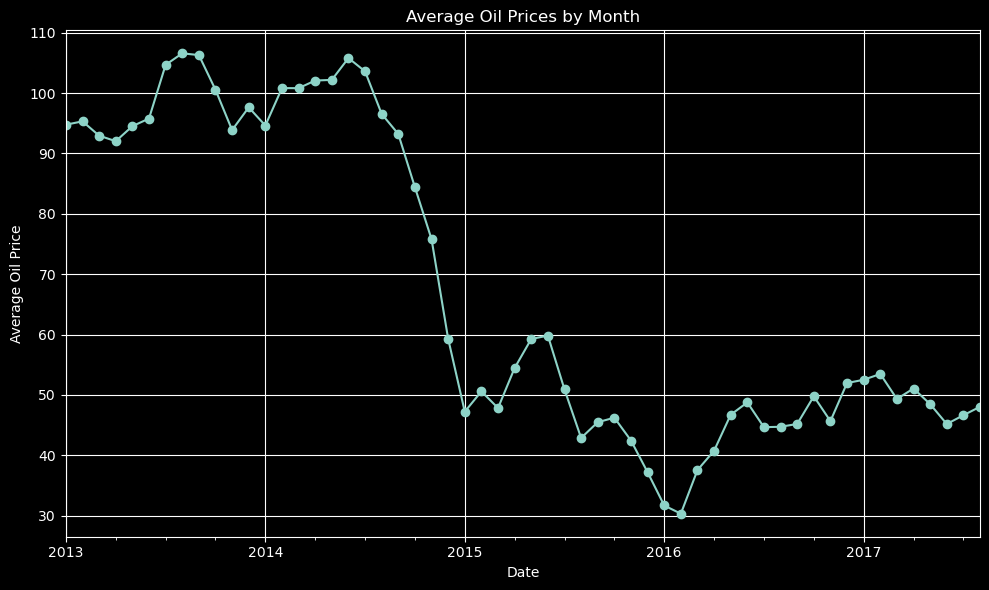

In [10]:
# Set 'date' column as the DataFrame index (if it's not already set)
oil_df.set_index('date', inplace=True)

# Resample data by month and calculate mean oil price
monthly_oil_mean = oil_df['dcoilwtico'].resample('M').mean()
plt.style.use('dark_background')
# Plotting aggregated oil prices by month
plt.figure(figsize=(10, 6))
monthly_oil_mean.plot(marker='o', linestyle='-')
plt.title('Average Oil Prices by Month')
plt.xlabel('Date')
plt.ylabel('Average Oil Price')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
def group(df, key, freq, col):
    grouped_df = df.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean = (col, 'mean'))
    grouped_df = grouped_df.reset_index()
    return grouped_df

In [12]:
# check grouped data
grouped_transactions_w_df = group(transactions_df, 'date', 'W', 'transactions')

In [13]:
def time(df, key, freq, col):
    grouped_df = group(df, key, freq, col)
    grouped_df['time'] = np.arange(len(grouped_df.index))
    column_time = grouped_df.pop('time')
    grouped_df.insert(1, 'time', column_time)
    return grouped_df

In [14]:
grouped_train_w_df = time(train_df, 'date', 'W', 'sales')
grouped_train_m_df = time(train_df, 'date', 'M', 'sales')

Time series

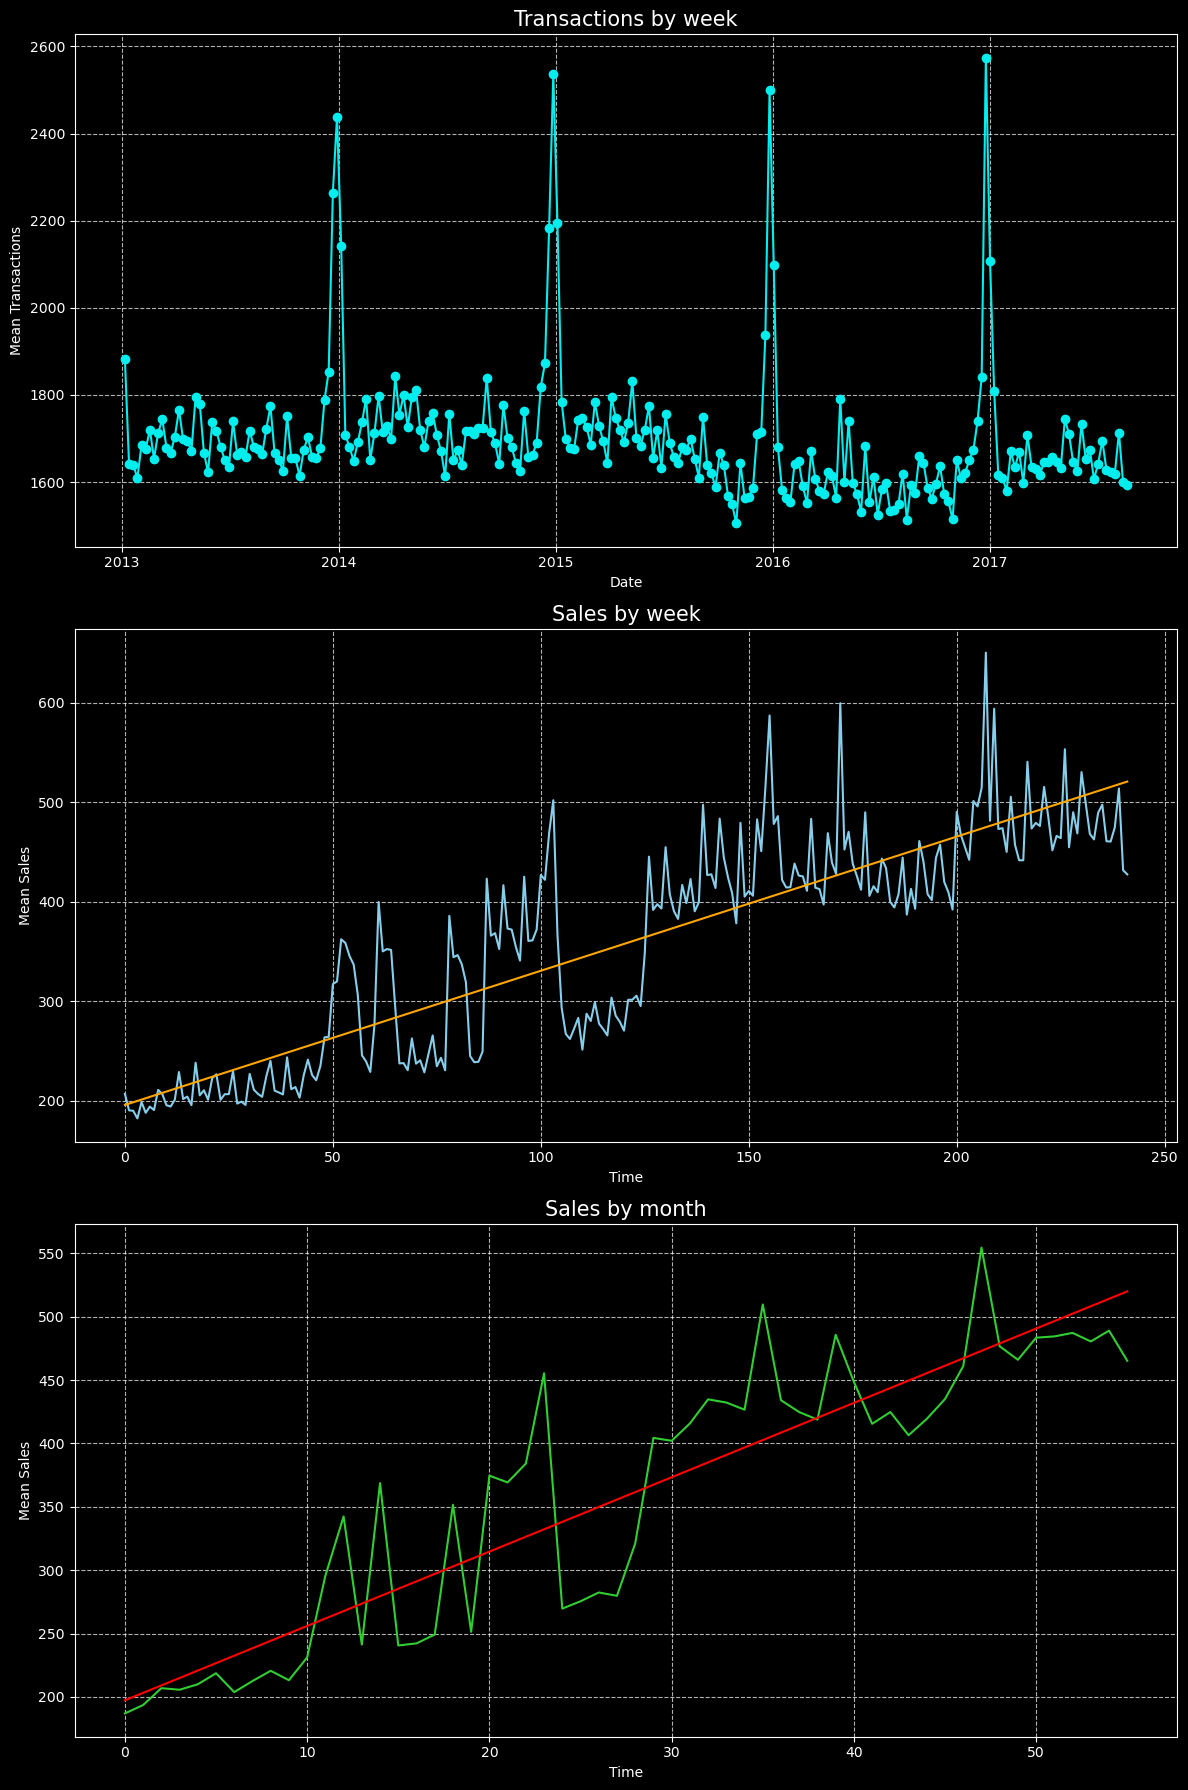

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Set the background color to black and change the plot style
plt.style.use('dark_background')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Weekly transactions
axes[0].plot(grouped_transactions_w_df['date'], grouped_transactions_w_df['mean'], color='#00EEEE', marker='o')
axes[0].set_title("Transactions by week", fontsize=15)
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Mean Transactions")
axes[0].grid(True, linestyle='--', alpha=0.7)

# Weekly Sales
axes[1].plot(grouped_train_w_df['time'], grouped_train_w_df['mean'], color='skyblue')
axes[1].set_title("Sales by week", fontsize=15)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Mean Sales")
axes[1].grid(True, linestyle='--', alpha=0.7)

# Using Linear regression for Weekly Sales
model_w = LinearRegression()
X_w = grouped_train_w_df[['time']]
y_w = grouped_train_w_df['mean']
model_w.fit(X_w, y_w)
axes[1].plot(X_w, model_w.predict(X_w), color='orange')

# Monthly sales
axes[2].plot(grouped_train_m_df['time'], grouped_train_m_df['mean'], color='limegreen')
axes[2].set_title("Sales by month", fontsize=15)
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Mean Sales")
axes[2].grid(True, linestyle='--', alpha=0.7)

# Using Linear regression for Monthly Sales
model_m = LinearRegression()
X_m = grouped_train_m_df[['time']]
y_m = grouped_train_m_df['mean']
model_m.fit(X_m, y_m)
axes[2].plot(X_m, model_m.predict(X_m), color='red')

plt.tight_layout()
plt.show()

Bar plots:

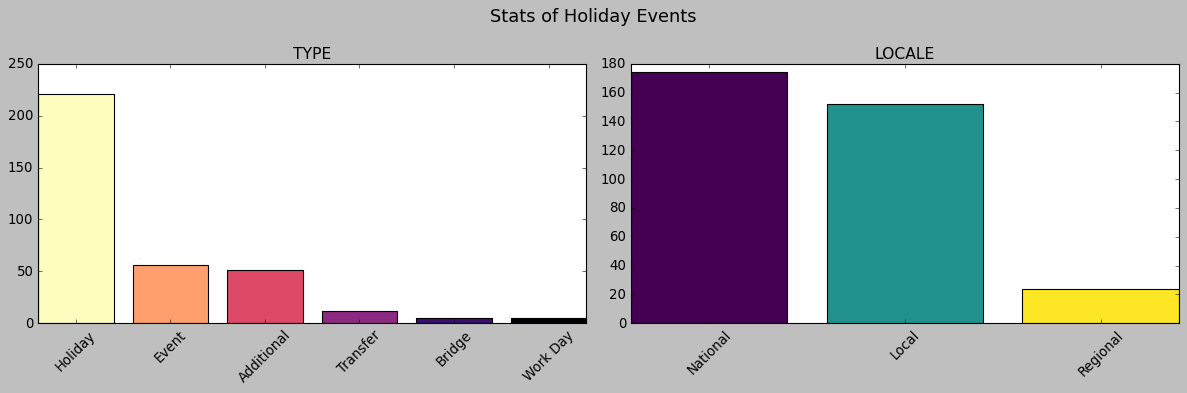

In [16]:
import matplotlib.pyplot as plt
plt.style.use('classic')

def plot_statistics(df, column, ax, colors):
    count_values = df[column].value_counts()
    ax.bar(count_values.index, count_values, color=colors)
    ax.set_title(column.upper(), fontsize=14)
    ax.tick_params(axis='x', rotation=45)

# Plotting stats for Holiday events DataFrame
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle("Stats of Holiday Events", fontsize=16)
colors_holidays = plt.cm.magma_r(np.linspace(0, 1, len(holiday_events_df['type'].unique())))
plot_statistics(holiday_events_df, "type", axes[0], colors_holidays)
colors_locale = plt.cm.viridis(np.linspace(0, 1, len(holiday_events_df['locale'].unique())))
plot_statistics(holiday_events_df, "locale", axes[1], colors_locale)
plt.tight_layout()
plt.show()

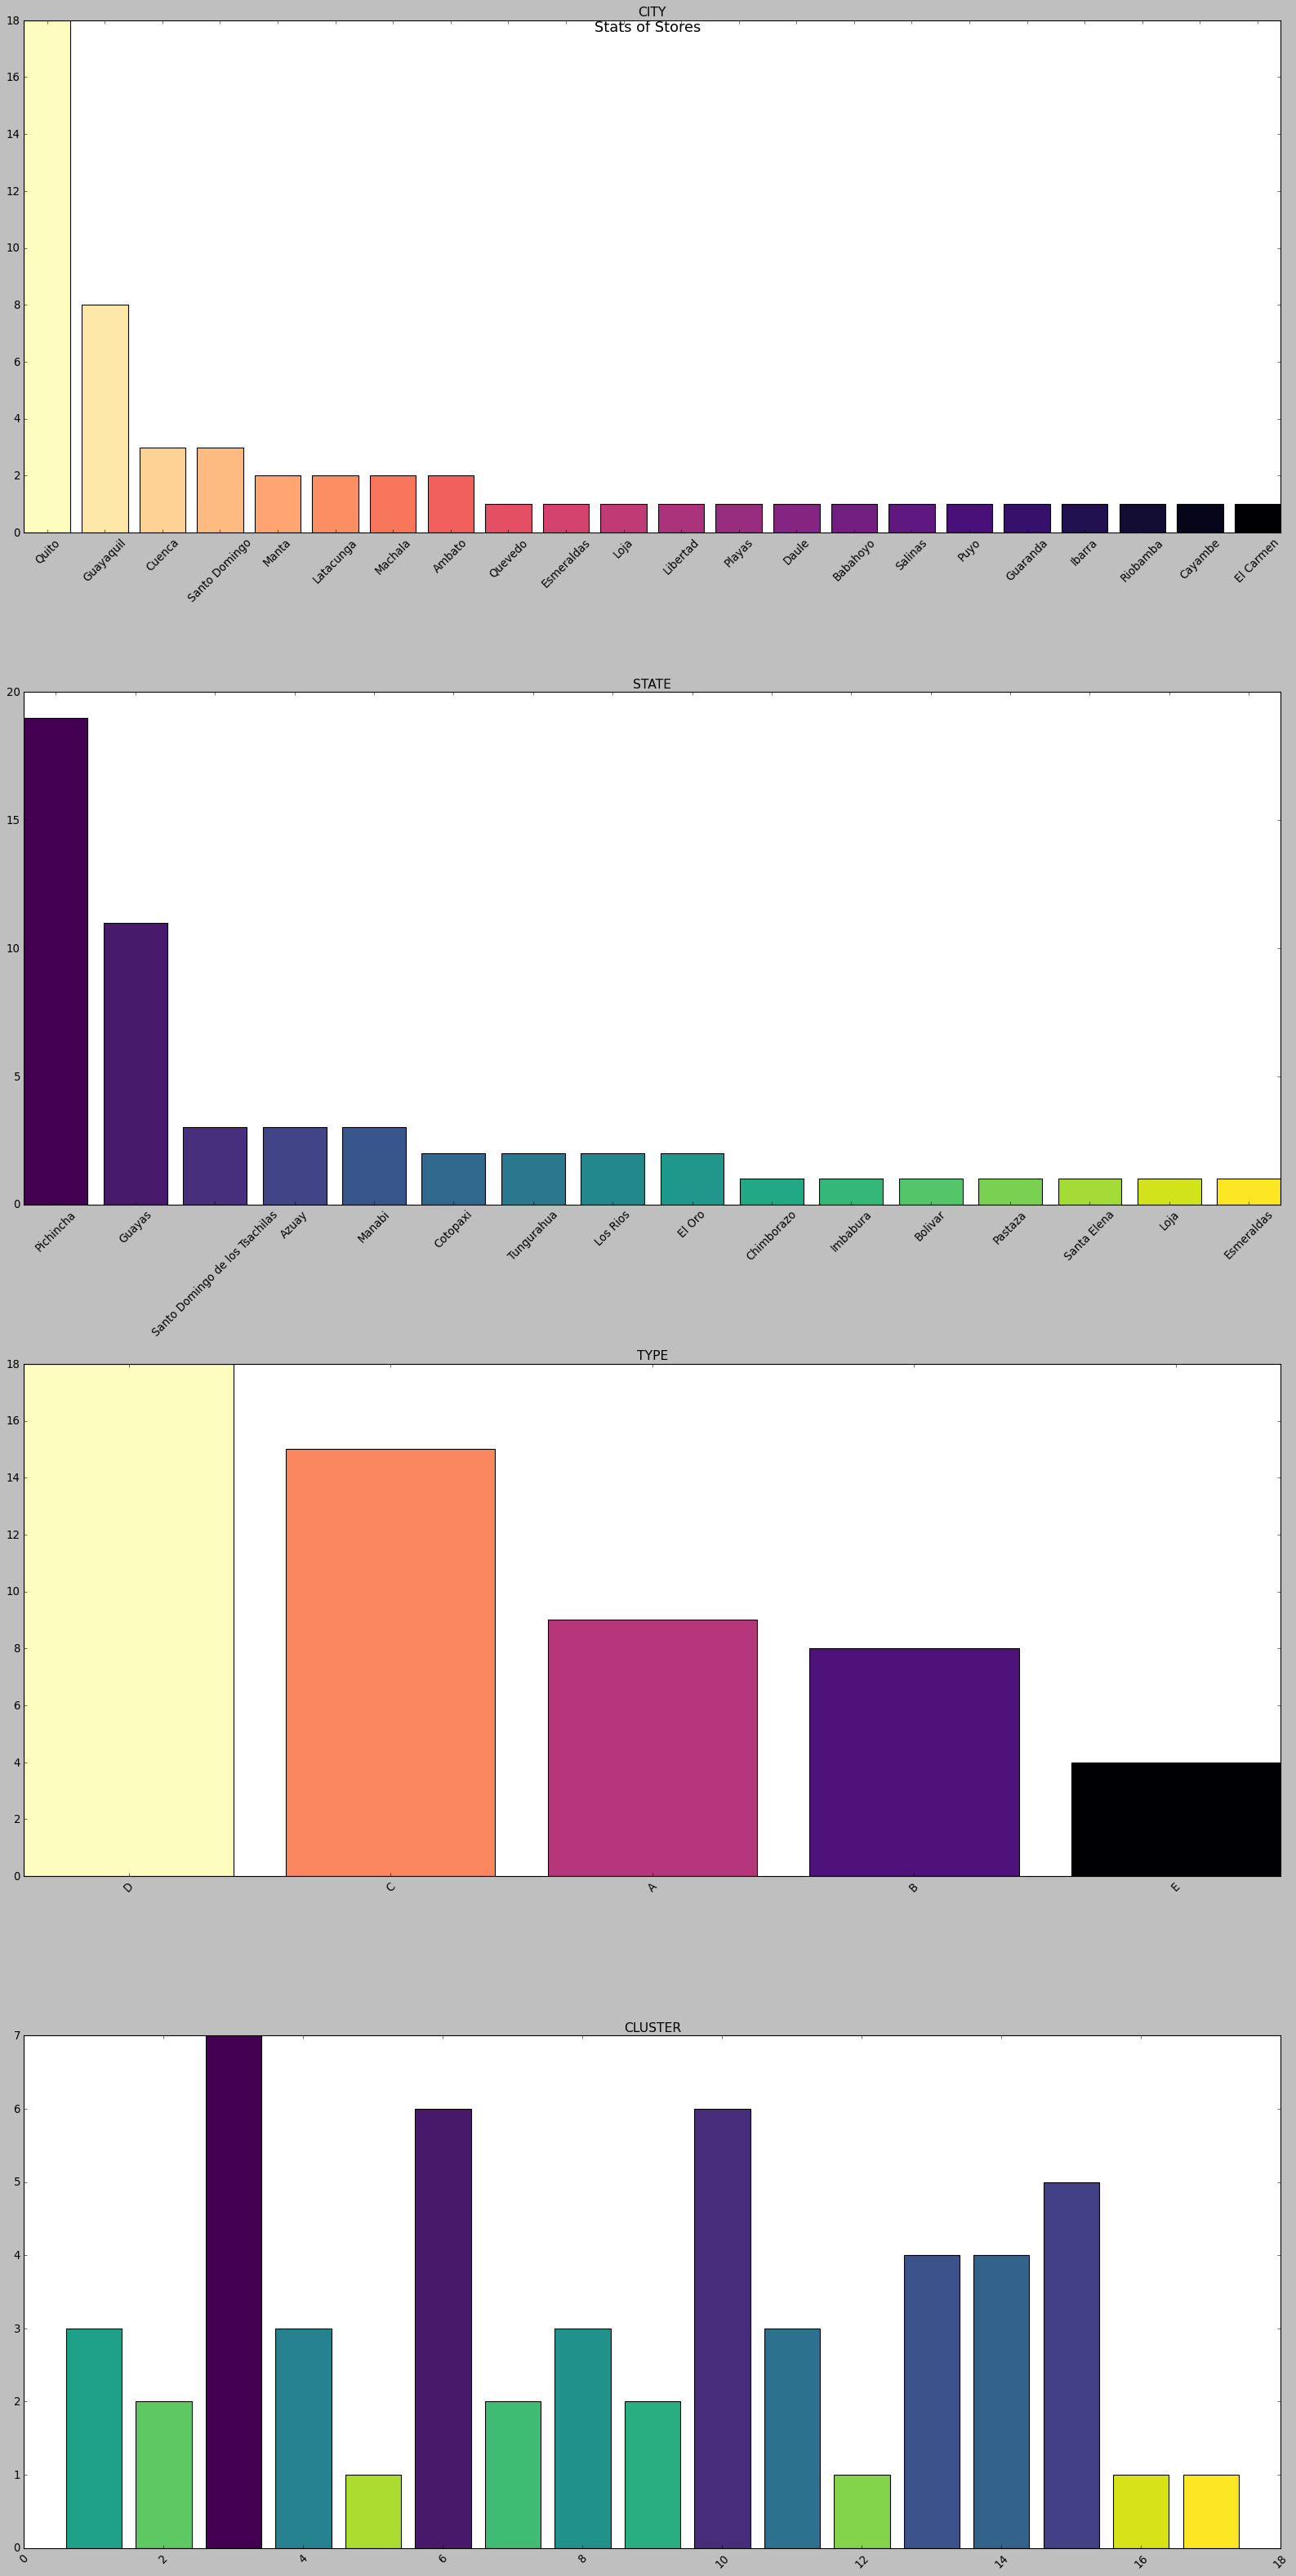

In [17]:
# Plotting stats for Stores DataFrame
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 40))
fig.suptitle("Stats of Stores", fontsize=16)
colors_stores_city = plt.cm.magma_r(np.linspace(0, 1, len(stores_df['city'].unique())))
plot_statistics(stores_df, "city", axes[0], colors_stores_city)
colors_stores_state = plt.cm.viridis(np.linspace(0, 1, len(stores_df['state'].unique())))
plot_statistics(stores_df, "state", axes[1], colors_stores_state)
colors_stores_type = plt.cm.magma_r(np.linspace(0, 1, len(stores_df['type'].unique())))
plot_statistics(stores_df, "type", axes[2], colors_stores_type)
colors_stores_cluster = plt.cm.viridis(np.linspace(0, 1, len(stores_df['cluster'].unique())))
plot_statistics(stores_df, "cluster", axes[3], colors_stores_cluster)
plt.tight_layout()
plt.show()

Pie Chart:

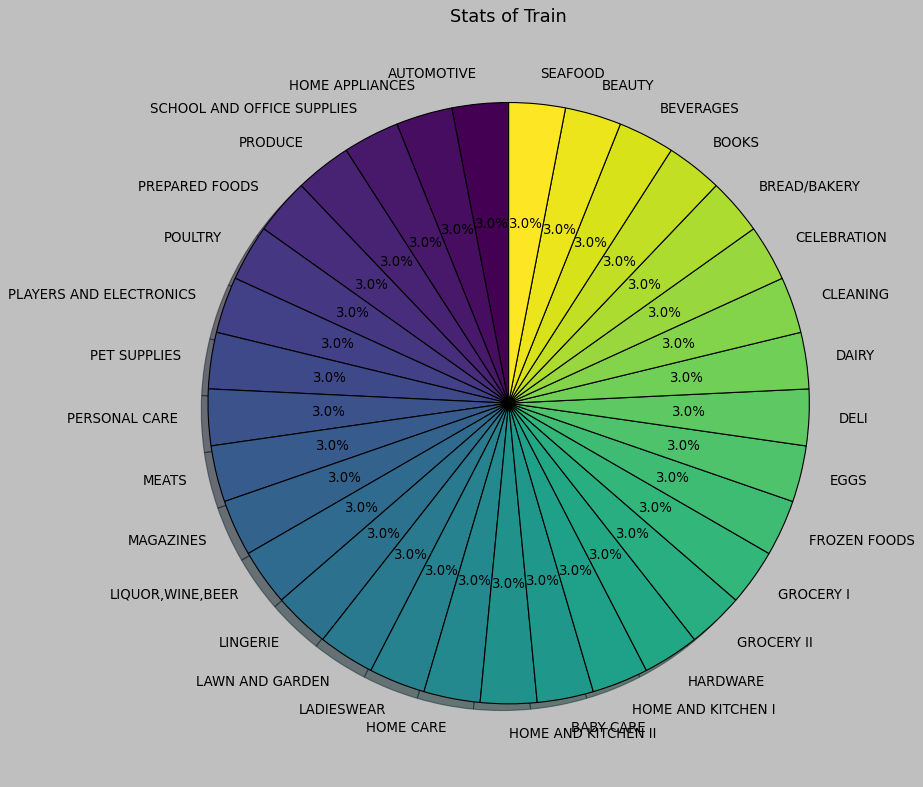

In [18]:
# Plotting stats for Train DataFrame using pie chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
count_classes = train_df['family'].value_counts()
ax.set_title("Stats of Train", fontsize=16)
colors_train = plt.cm.viridis(np.linspace(0, 1, len(train_df['family'].unique())))
ax.pie(count_classes, labels=count_classes.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors_train)
plt.tight_layout()
plt.show()

Boxplot:

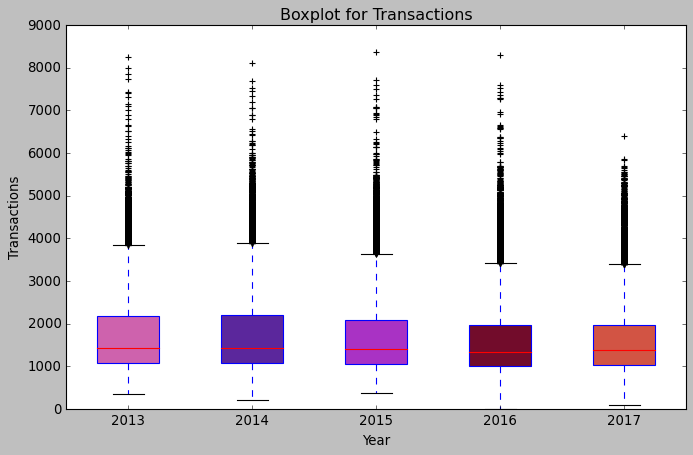

In [19]:
import matplotlib.pyplot as plt
import numpy as np

years = transactions_df['date'].dt.year.unique().tolist()
grouped_transactions = [transactions_df[transactions_df['date'].dt.year == year]['transactions'] for year in years]

fig, ax = plt.subplots(figsize=(10, 6))

# Generating random colors for each year
box_colors = np.random.rand(len(years), 3)

# Create a boxplot with grouped transactions and years as x-axis labels
bp = ax.boxplot(grouped_transactions, patch_artist=True, labels=years, boxprops=dict(facecolor='white'))

for i, box in enumerate(bp['boxes']):
    box.set(facecolor=box_colors[i])

ax.set_xlabel('Year')
ax.set_ylabel('Transactions')
ax.set_title("Boxplot for Transactions")

plt.show()

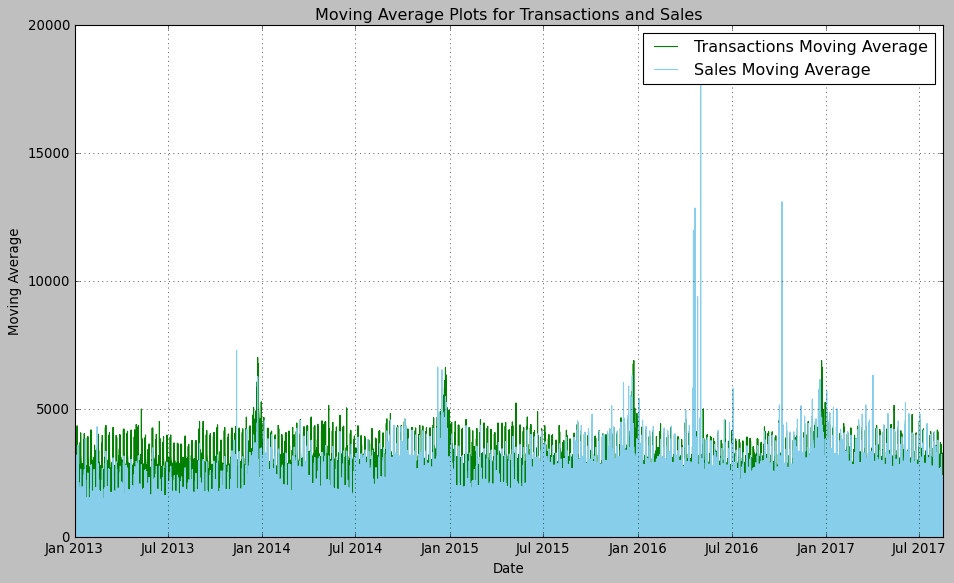

In [20]:
import matplotlib.pyplot as plt

# Calculate moving averages
transactions_ma = transactions_df['transactions'].rolling(window=7, min_periods=1).mean()  # Adjust the window size as needed
sales_ma = train_df['sales'].rolling(window=7, min_periods=1).mean()  # Adjust the window size as needed

# Plotting moving average plots
plt.figure(figsize=(14, 8))

# Plotting Transactions moving average in green
plt.plot(transactions_df['date'], transactions_ma, color='green', label='Transactions Moving Average')

# Plotting Sales moving average in green
plt.plot(train_df['date'], sales_ma, color='skyblue', label='Sales Moving Average')

plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Moving Average Plots for Transactions and Sales')
plt.legend()
plt.grid(True)
plt.show()

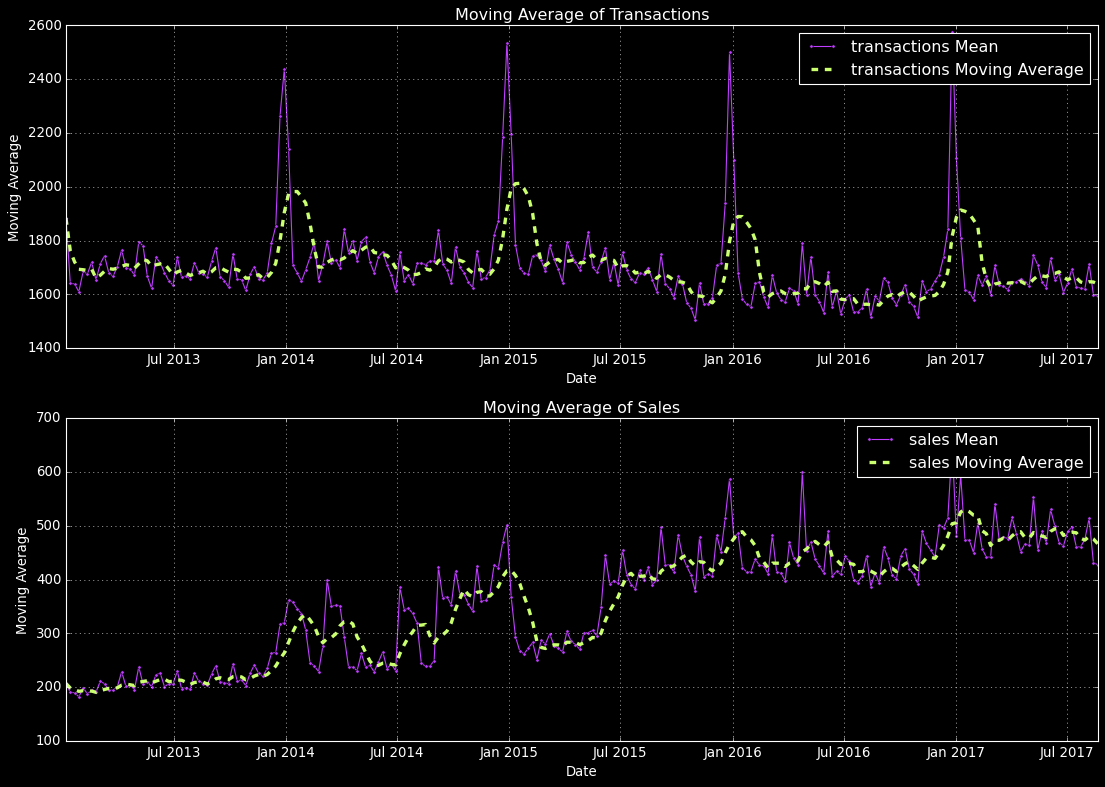

In [21]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
def plot_moving_average(df, key, freq, col, window, min_periods, ax, title):
    grouped_df = df.groupby(pd.Grouper(key=key, freq=freq)).agg(mean=(col, 'mean'))
    moving_average = grouped_df['mean'].rolling(window=window, min_periods=min_periods).mean()
    ax.plot(grouped_df.index, grouped_df['mean'], linestyle='-', marker='o', markersize=3, color='#BF3EFF', label=f'{col} Mean')
    ax.plot(grouped_df.index, moving_average, linestyle='--', linewidth=3, color='#CAFF70', label=f'{col} Moving Average')
    ax.set_xlabel('Date')
    ax.set_ylabel('Moving Average')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Plotting Transactions moving average
plot_moving_average(transactions_df, 'date', 'W', 'transactions', 7, 1, axes[0], 'Moving Average of Transactions')

# Plotting Sales moving average
plot_moving_average(train_df, 'date', 'W', 'sales', 7, 1, axes[1], 'Moving Average of Sales')

plt.tight_layout()
plt.show()

Time series prediction into 45 days Linear Regression

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

def plot_trend_forecast(dataframe, time_key, time_freq, target_column, title1, title2):
    # Grouping the dataframe based on time frequency and calculating mean
    df_grouped = dataframe.groupby(pd.Grouper(key=time_key, freq=time_freq)).agg(mean=(target_column, 'mean'))
    # Deterministic Process for trend analysis
    dp = DeterministicProcess(index=df_grouped.index, constant=True, order=1, drop=True)
    dp.index.freq = time_freq  # Set the frequency of the index
    
    # Creating features for the dates given in the index
    X_train = dp.in_sample()
    y_train = df_grouped["mean"]  # Target variable
    y_train.index = X_train.index
    
    # Fit linear regression model
    trend_model = LinearRegression(fit_intercept=False)
    trend_model.fit(X_train, y_train)
    y_train_pred = pd.Series(trend_model.predict(X_train), index=X_train.index)
    
    # Plotting the trend and predicted trend
    plt.figure(figsize=(15, 8))
    plt.plot(y_train.index, y_train, linestyle='--', label="Mean", color="#BF3EFF")
    plt.plot(y_train_pred.index, y_train_pred, linewidth=3, label="Trend", color='#00EEEE')
    plt.title(title1, fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Forecasting Trend for future steps
    forecast_steps = 45
    X_forecast = dp.out_of_sample(steps=forecast_steps)
    y_forecast = pd.Series(trend_model.predict(X_forecast), index=X_forecast.index)
    
    # Plotting the trend, predicted trend, and forecasted trend
    plt.figure(figsize=(15, 8))
    plt.plot(y_train.index, y_train, linestyle='--', label="Mean", color="#BF3EFF")
    plt.plot(y_train_pred.index, y_train_pred, linewidth=3, label="Trend", color='#00EEEE')
    plt.plot(y_forecast.index, y_forecast, linewidth=3, label="Predicted Trend", color='#F08080')
    plt.title(title2, fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

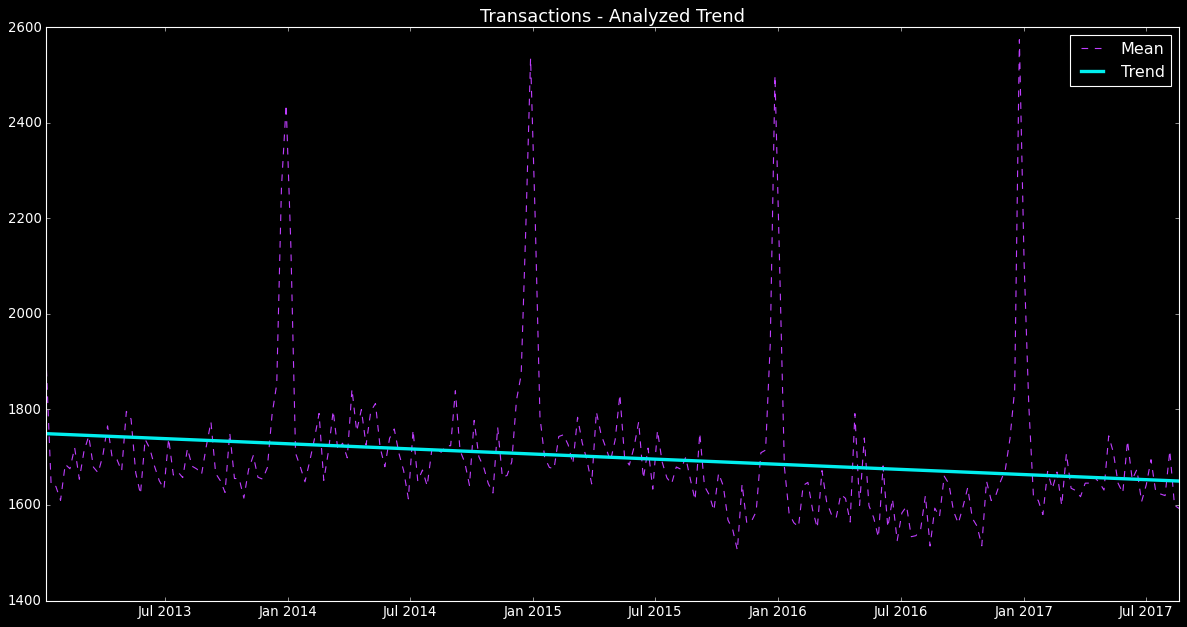

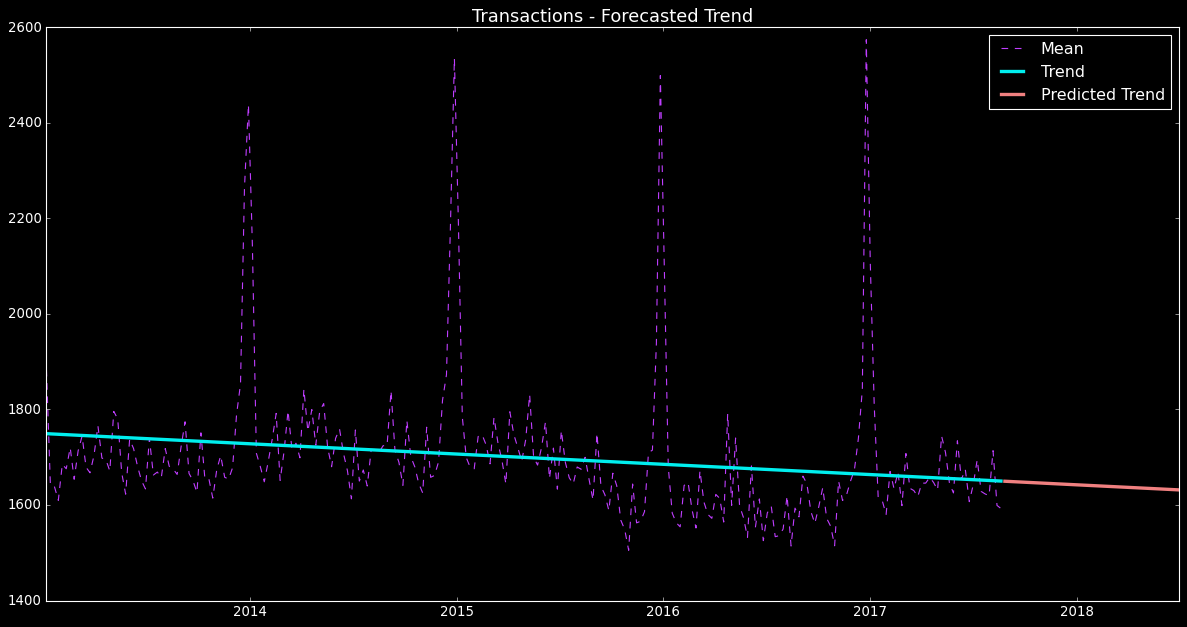

In [23]:
# Analyzing trend and forecasting for Transactions
plot_trend_forecast(transactions_df, 'date', 'W', 'transactions', 
                    "Transactions - Analyzed Trend", "Transactions - Forecasted Trend")

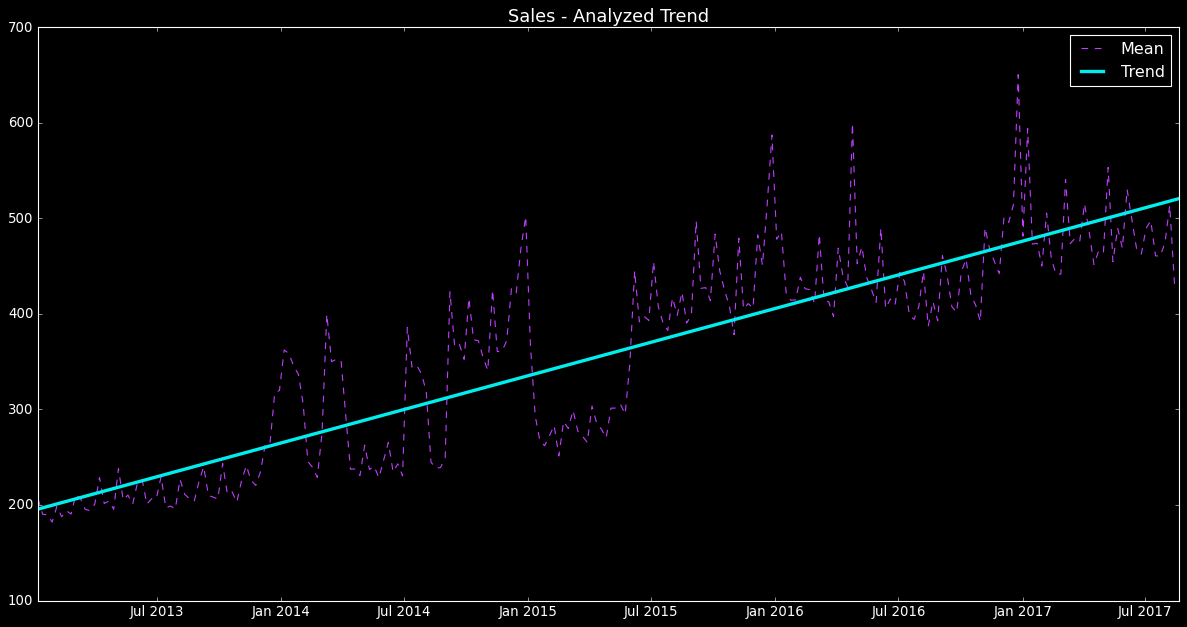

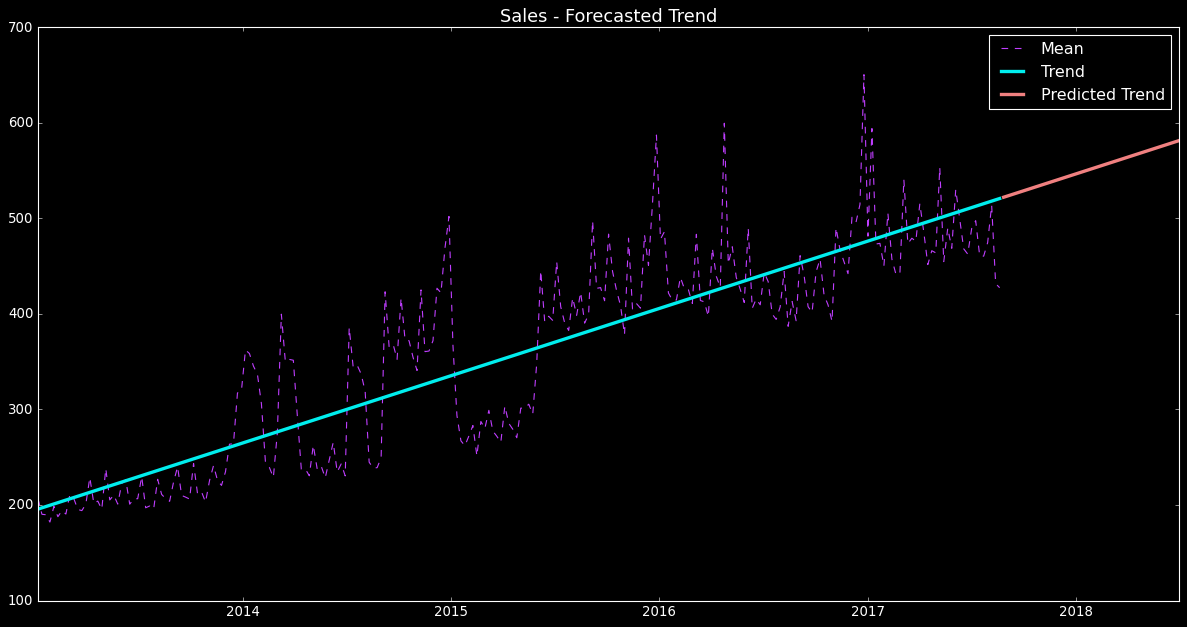

In [24]:
# Analyzing trend and forecasting for Sales
plot_trend_forecast(train_df, 'date', 'W', 'sales', 
                    "Sales - Analyzed Trend", "Sales - Forecasted Trend")

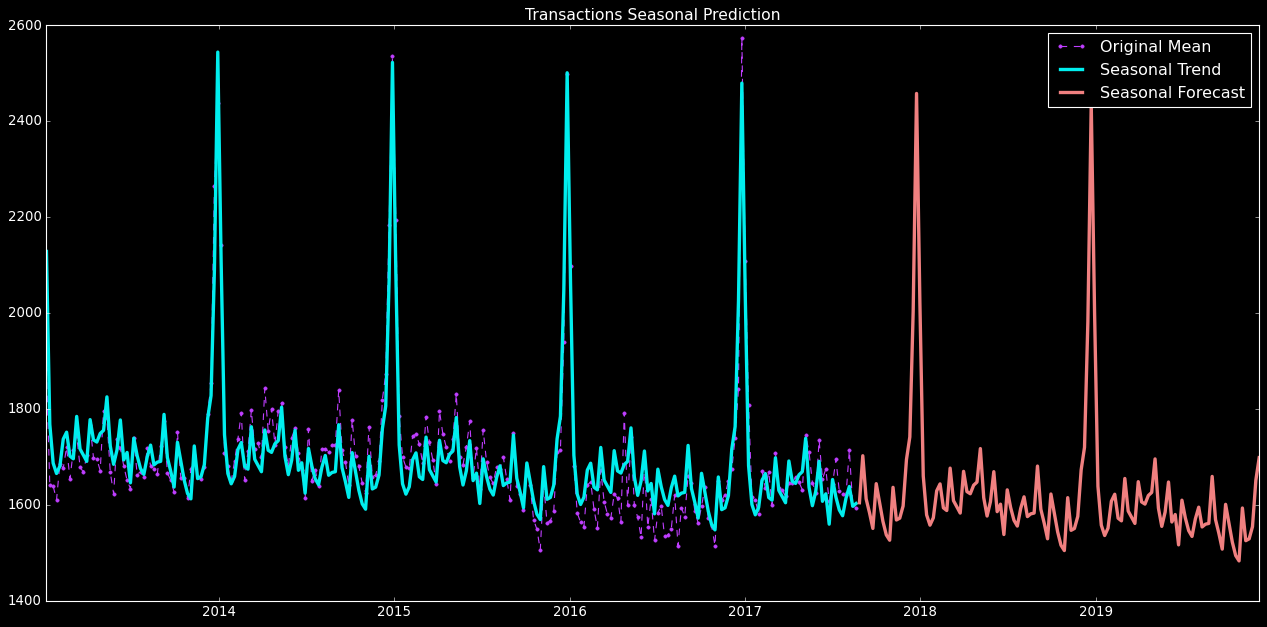

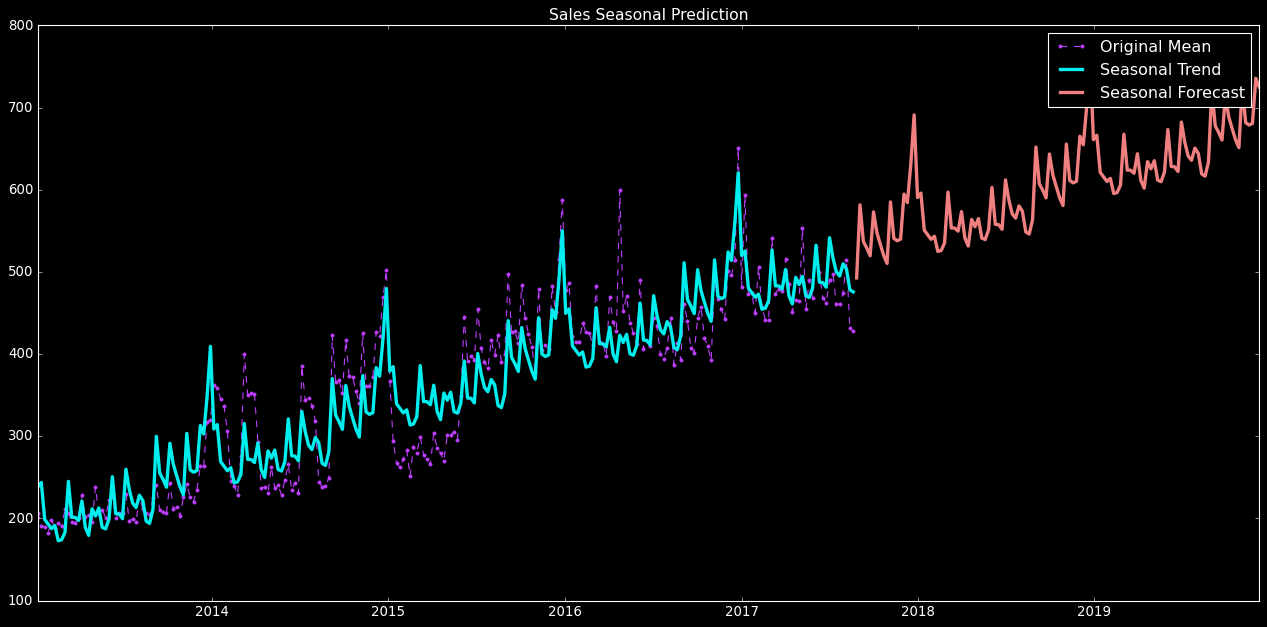

In [25]:
from statsmodels.tsa.deterministic import CalendarFourier
from sklearn.linear_model import LinearRegression

def Seasonal_prediction(dataframe, time_key, time_freq, target_column, title):
    # Define Fourier terms for seasonality
    fourier = CalendarFourier(freq=time_freq, order=10)  # Adjust order and frequency as needed
    # Grouping the dataframe based on time frequency and calculating mean
    df_grouped = dataframe.groupby(pd.Grouper(key=time_key, freq=time_freq)).agg(mean=(target_column, 'mean'))
    
    # Deterministic Process for seasonal analysis
    dp = DeterministicProcess(index=df_grouped.index, constant=True, order=1, period=None, 
                              seasonal=True, additional_terms=[fourier], drop=True)
    dp.index.freq = time_freq  # Set the frequency of the index

    # Creating features for the dates given in the index
    X_train = dp.in_sample()
    y_train = df_grouped["mean"]  # Target variable
    y_train.index = X_train.index

    # Fit linear regression model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    y_train_pred = pd.Series(model.predict(X_train), index=X_train.index)

    # Forecasting Seasonal Trend for future steps
    forecast_steps = 120
    X_forecast = dp.out_of_sample(steps=forecast_steps)
    y_forecast = pd.Series(model.predict(X_forecast), index=X_forecast.index)

    # Plotting the original mean values, seasonal trend, and forecasted seasonal trend
    plt.figure(figsize=(16, 8))
    plt.plot(y_train.index, y_train, linestyle='--', marker='.', label="Original Mean", color="#BF3EFF")
    plt.plot(y_train_pred.index, y_train_pred, linewidth=3, label="Seasonal Trend", color='#00EEEE')
    plt.plot(y_forecast.index, y_forecast, linewidth=3, label="Seasonal Forecast", color='#F08080')
    plt.title(title, fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Predicting seasonality for Transactions
Seasonal_prediction(transactions_df, 'date', 'W', 'transactions', "Transactions Seasonal Prediction")

# Predicting seasonality for Sales
Seasonal_prediction(train_df, 'date', 'W', 'sales', "Sales Seasonal Prediction")

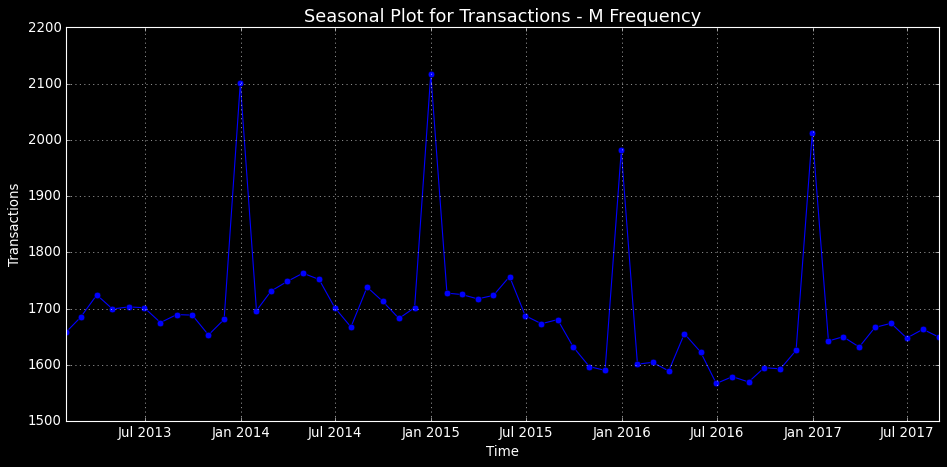

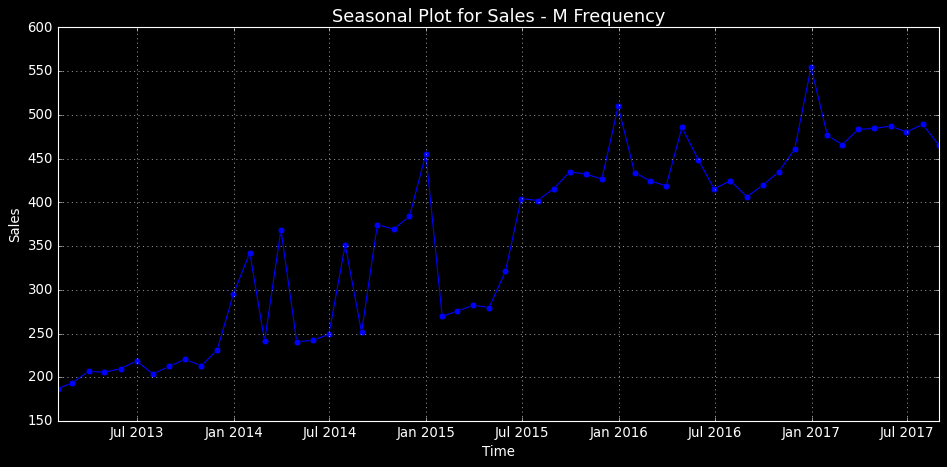

In [26]:
import matplotlib.pyplot as plt

def seasonal_plot(dataframe, time_key, target_column, frequency):
    # Grouping the dataframe based on the specified frequency and calculating the mean
    df_grouped = dataframe.groupby(pd.Grouper(key=time_key, freq=frequency)).agg(mean=(target_column, 'mean'))
    
    # Plotting the seasonal patterns
    plt.figure(figsize=(12, 6))
    plt.plot(df_grouped.index, df_grouped['mean'], marker='o', linestyle='-', color='blue')
    plt.title(f"Seasonal Plot for {target_column.capitalize()} - {frequency} Frequency", fontsize=16)
    plt.xlabel('Time')
    plt.ylabel(target_column.capitalize())
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create a seasonal plot for Transactions with weekly frequency
seasonal_plot(transactions_df, 'date', 'transactions', 'M')

# Create a seasonal plot for Sales with monthly frequency
seasonal_plot(train_df, 'date', 'sales', 'M')

XG Boost

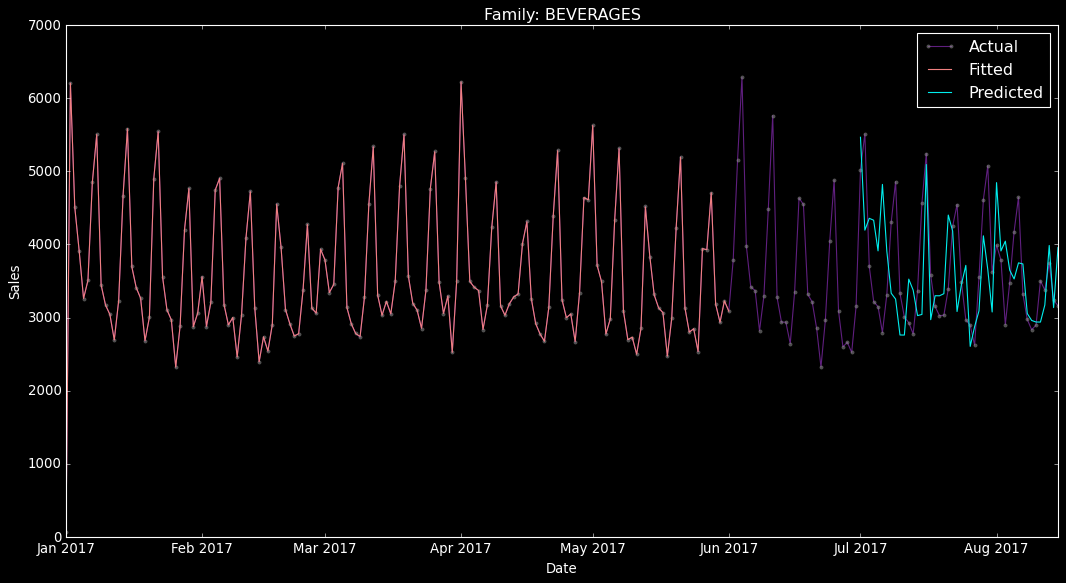

In [28]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.deterministic import DeterministicProcess
import matplotlib.pyplot as plt

class HybridForecaster:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.target_columns = None  # Store column names from fit method

    def fit(self, features_model_1, features_model_2, target):
        # Train model_1
        self.model_1.fit(features_model_1, target)

        # Make predictions using model_1
        predictions_model_1 = pd.DataFrame(
            self.model_1.predict(features_model_1), 
            index=features_model_1.index, columns=target.columns,
        )

        # Compute residuals
        residuals = target - predictions_model_1
        residuals = residuals.stack().squeeze()  # Convert to a Series

        # Train model_2 on residuals
        self.model_2.fit(features_model_2, residuals)

        # Save column names for the predict method
        self.target_columns = target.columns

    def predict(self, features_model_1, features_model_2):
        # Predict with model_1
        predictions_model_1 = pd.DataFrame(
            self.model_1.predict(features_model_1), 
            index=features_model_1.index, columns=self.target_columns,
        )
        predictions_model_1 = predictions_model_1.stack().squeeze()  # Convert to a Series

        # Add model_2 predictions to model_1 predictions
        final_predictions = predictions_model_1 + self.model_2.predict(features_model_2)

        return final_predictions.unstack()

# Load the store_sales dataframe
store_sales = train_df.copy()
store_sales['date'] = pd.to_datetime(store_sales['date'])
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()

# Filter the data for the 'BEVERAGES' family
beverages_sales = store_sales.loc[(slice(None), 'BEVERAGES'), :]

# Group by 'family' and 'date', calculate the mean for 2017
family_sales = (
    beverages_sales
    .groupby(['family', 'date'])
    .mean()
    .unstack('family')
    .loc['2017']  # Filter for a specific year if needed
)

# Extract the target series for 'BEVERAGES'
target_sales = family_sales.loc[:, 'sales']

# Creating features for Linear Regression
deterministic_process = DeterministicProcess(index=target_sales.index, order=1)
features_model_1 = deterministic_process.in_sample()

# Creating features for XGBoost
features_model_2 = family_sales.drop('sales', axis=1).stack()

# Encode 'family'
label_encoder = LabelEncoder()
features_model_2 = features_model_2.reset_index('family')
features_model_2['family'] = label_encoder.fit_transform(features_model_2['family'])

# Encode seasonality
features_model_2["day"] = features_model_2.index.day  # Day of the month

# Initialize the Boosted Hybrid model
hybrid_model = HybridForecaster(
    model_1=LinearRegression(),
    model_2=XGBRegressor()
)

# Split the data for training and validation
target_train, target_valid = target_sales[:"2017-06-01"], target_sales["2017-07-01":]
features_1_train, features_1_valid = features_model_1[: "2017-06-01"], features_model_1["2017-07-01" :]
features_2_train, features_2_valid = features_model_2.loc[:"2017-06-01"], features_model_2.loc["2017-07-01":]

# Fit the Boosted Hybrid model
hybrid_model.fit(features_1_train, features_2_train, target_train)

# Predictions
predicted_train = hybrid_model.predict(features_1_train, features_2_train).clip(0.0)
predicted_valid = hybrid_model.predict(features_1_valid, features_2_valid).clip(0.0)

# Plot individual graphs for each family
selected_families = target_sales.columns[0:6]
for family in selected_families:
    plt.figure(figsize=(16, 8))
    plt.plot(target_sales.index, target_sales[family], linestyle='-', color="#BF3EFF", marker='.', markeredgecolor="0.50", markerfacecolor="0.60", alpha=0.5, label='Actual')
    plt.plot(predicted_train.index, predicted_train[family], linestyle='-', color='#F08080', label='Fitted')
    plt.plot(predicted_valid.index, predicted_valid[family], linestyle='-', color='#00EEEE', label='Predicted')
    plt.title(f'Family: {family}')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

In [29]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

target_column = 'sales'

# Drop any non-numeric columns if necessary
my_dataframe_numeric = train_df.select_dtypes(include=[np.number])

# Splitting data into features (X) and target variable (y)
X = my_dataframe_numeric.drop(target_column, axis=1)
y = my_dataframe_numeric[target_column]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) as evaluation metric
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 809.16778668661


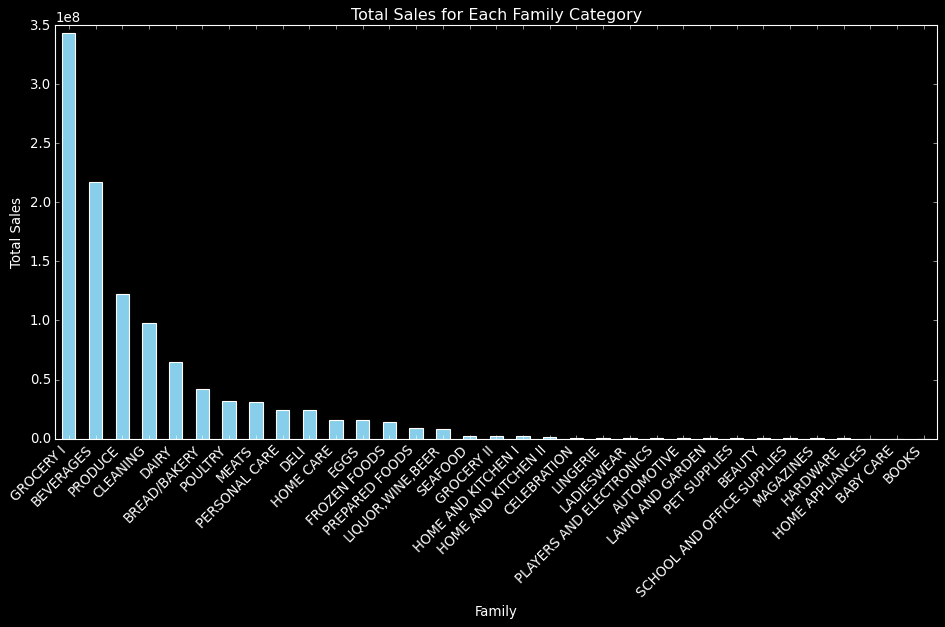

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train_df' is your dataframe containing sales and family information
# Aggregate total sales for each family category
family_sales = train_df.groupby('family')['sales'].sum().sort_values(ascending=False)

# Plotting the total sales for each family category
plt.figure(figsize=(12, 8))
family_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales for Each Family Category')
plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

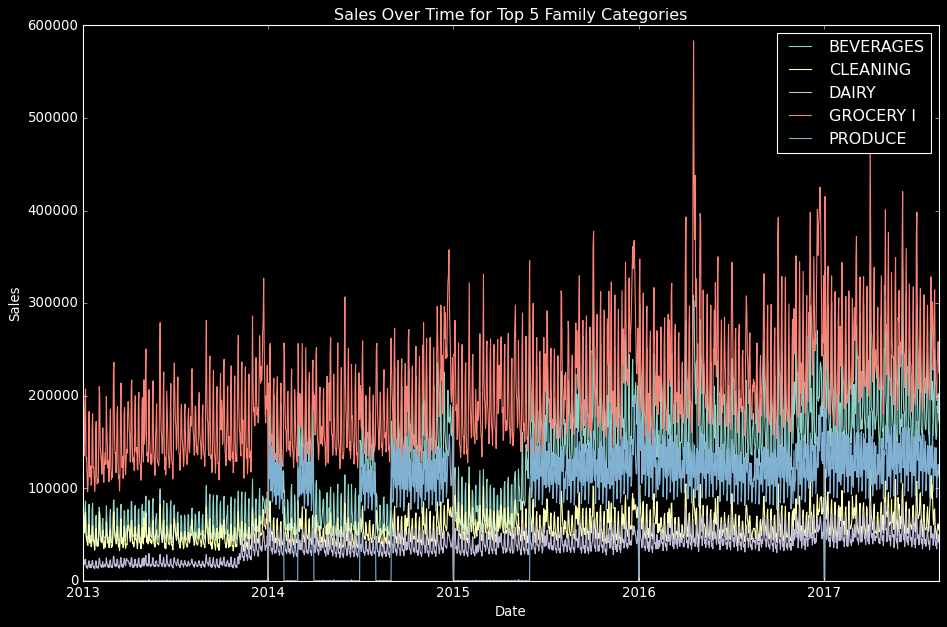

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'date' column to datetime if it's not already in datetime format
train_df['date'] = pd.to_datetime(train_df['date'])

# Aggregate total sales for each family category
family_sales = train_df.groupby('family')['sales'].sum().sort_values(ascending=False)

# Select top 5 families based on total sales
top_5_families = family_sales.head(5).index

# Filter family_sales DataFrame for only the top 5 families
family_sales_filtered = train_df[train_df['family'].isin(top_5_families)]

# Group by family and date to get sales data for the top 5 families
family_sales_grouped = family_sales_filtered.groupby(['family', 'date'])['sales'].sum().reset_index()

# Create a time series plot for sales over time for each of the top 5 families
plt.figure(figsize=(12, 8))
for family, data in family_sales_grouped.groupby('family'):
    plt.plot(data['date'], data['sales'], label=family)

plt.title('Sales Over Time for Top 5 Family Categories')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# Calculate correlation between date and sales for each of the top 5 families
correlation_data = {}
for family, data in family_sales_grouped.groupby('family'):
    correlation = data['date'].corr(data['sales'])
    correlation_data[family] = correlation

# Display correlation values for each of the top 5 families
correlation_df = pd.DataFrame.from_dict(correlation_data, orient='index', columns=['Correlation'])

In [32]:
print("Correlation between Date and Sales for Top 5 Family Categories:")
print(correlation_df)

Correlation between Date and Sales for Top 5 Family Categories:
           Correlation
BEVERAGES         0.73
CLEANING          0.44
DAIRY             0.70
GROCERY I         0.56
PRODUCE           0.75


In [33]:
print(holiday_events_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB
None


In [35]:
print(oil_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB
None


In [36]:
print(stores_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None


In [37]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB
None


In [38]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None


In [39]:
print(transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB
None
